In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
# loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('insurance.csv')

In [4]:
# first 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

In [6]:
# getting some informations about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [7]:
# checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\VAISNAVI\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


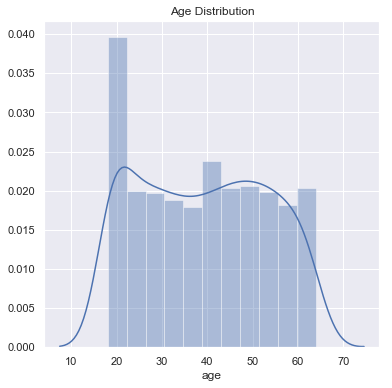

In [9]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

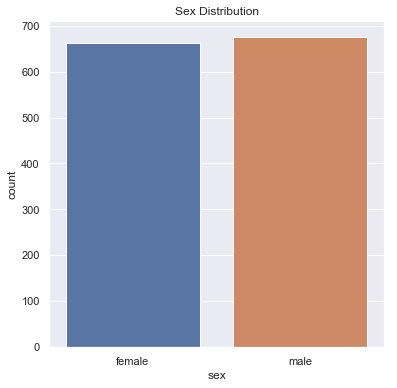

In [10]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [11]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

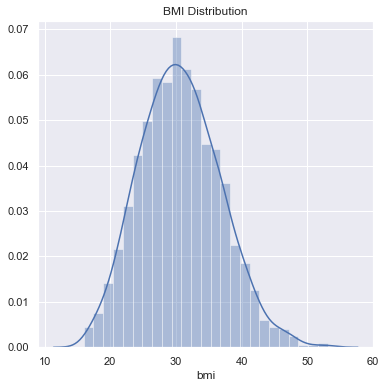

In [12]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

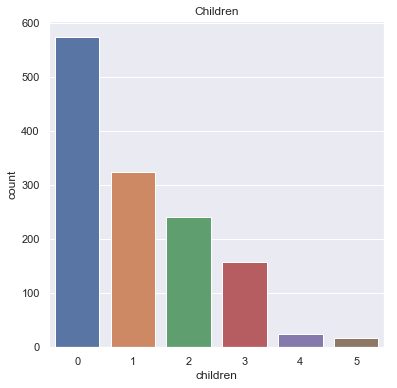

In [13]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

In [14]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

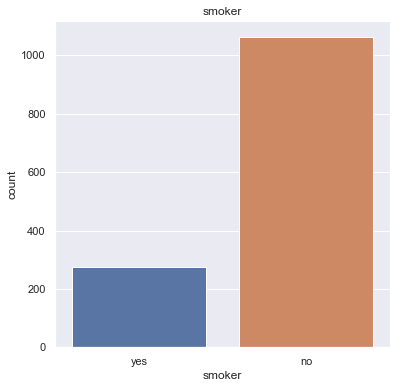

In [15]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

In [16]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

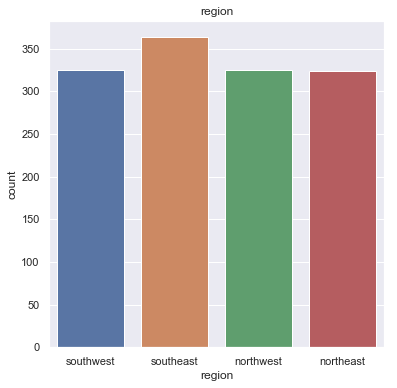

In [17]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

In [18]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

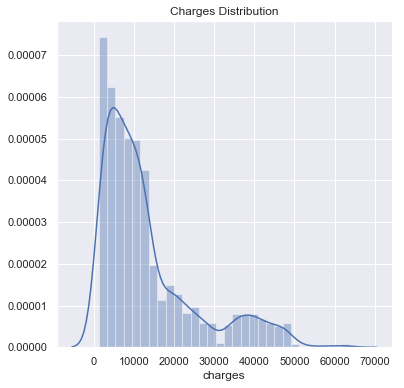

In [ ]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

In [ ]:
# encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [ ]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [ ]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
5      31    1  25.740         0       1       0
6      46    1  33.440         1       1       0
7      37    1  27.740         3       1       3
8      37    0  29.830         2       1       2
9      60    1  25.840         0       1       3
10     25    0  26.220         0       1       2
11     62    1  26.290         0       0       0
12     23    0  34.400         0       1       1
13     56    1  39.820         0       1       0
14     27    0  42.130         0       0       0
15     19    0  24.600         1       1       1
16     52    1  30.780         1       1       2
17     23    0  23.845         0       1       2
18     56    0  40.300         0       1       1
19     30    0  35.3

In [ ]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
6        8240.58960
7        7281.50560
8        6406.41070
9       28923.13692
10       2721.32080
11      27808.72510
12       1826.84300
13      11090.71780
14      39611.75770
15       1837.23700
16      10797.33620
17       2395.17155
18      10602.38500
19      36837.46700
20      13228.84695
21       4149.73600
22       1137.01100
23      37701.87680
24       6203.90175
25      14001.13380
26      14451.83515
27      12268.63225
28       2775.19215
29      38711.00000
           ...     
1308    33900.65300
1309     6875.96100
1310     6940.90985
1311     4571.41305
1312     4536.25900
1313    36397.57600
1314    18765.87545
1315    11272.33139
1316     1731.67700
1317     1163.46270
1318    19496.71917
1319     7201.70085
1320     5425.02335
1321    28101.33305
1322    12981.34570
1323    43896.37630
1324     4239.89265
1325    13143.33665
1326     7050.02130


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [ ]:
# loading the Linear Regression model
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

In [ ]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.751505643411174


In [ ]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)

In [ ]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7447273869684077


In [ ]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[3760.0805765]
The insurance cost is USD  3760.080576496046


In [ ]:
input_data_reshaped

array([[31.  ,  1.  , 25.74,  0.  ,  1.  ,  0.  ]])

In [ ]:
import pickle
file_name='insurance.pkl'
with open(file_name,'wb') as f:
    pickle.dump(regressor,f)

In [ ]:
with open("insurance.pkl","rb") as f:
    c = pickle.load(f)
print(c)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [ ]:
c.predict([[31,1,25.74,0,1,0]])

array([3760.0805765])

In [ ]:
from tkinter import *
from tkinter import ttk
from tkinter import messagebox
#Create an instance of Tkinter frame
win = Tk()
#Set the geometry of Tkinter frame
win.geometry("750x250")
l=[]
def get_content():
    l.append(int(age.get()))
    l.append(int(sex.get()))
    l.append(float(bmi.get()))
    l.append(int(children.get()))
    l.append(int(smoker.get()))
    l.append(int(region.get()))
    #print(entry.get())    
def get_pred():
    input_data = l
    input_data_as_numpy_array = np.asarray(input_data)
    input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
    prediction = c.predict(input_data_reshaped)
    messagebox.showinfo("The insurance cost is USD",prediction[0])    
win.title("MEDICAL INSURANCE COST PREDICTION")
lb1 = Label(text = "COST PREDICTION",fg="red",bg="white",font=("georgia",25,'bold'))
lb1.pack()
lbl1 = Label(bg="white",font=("georgia",40))
lbl1.pack()
#Create an entry widget
alabel = Label(win,text="Enter Your Age",font=('calibre',15, 'bold'))
alabel.pack()
age= Entry(win,width= 40,justify = CENTER)
age.pack(side = TOP, ipadx = 30, ipady = 6)

slabel = Label(win,text="Enter Your Gender (0-M,1-F)",font=('calibre',15, 'bold'))
slabel.pack()
sex= Entry(win, width= 40,justify = CENTER)
sex.pack(side = TOP, ipadx = 30, ipady = 6)

blabel = Label(win,text="Enter Your Bmi",font=('calibre',15, 'bold'))
blabel.pack()
bmi= Entry(win, width= 40,justify = CENTER)
bmi.pack(side = TOP, ipadx = 30, ipady = 6)

clabel = Label(win,text="Enter No Of Children",font=('calibre',15, 'bold'))
clabel.pack()
children= Entry(win, width= 40,justify = CENTER)
children.pack(side = TOP, ipadx = 30, ipady = 6)

smlabel = Label(win,text="Enter Value 0 For Non-Smoker and 1 For Smoker",font=('calibre',15, 'bold'))
smlabel.pack()
smoker= Entry(win, width= 40,justify = CENTER)
smoker.pack(side = TOP, ipadx = 30, ipady = 6)

rlabel = Label(win,text="Enter Your Region",font=('calibre',15, 'bold'))
rlabel.pack()
region= Entry(win, width= 40,justify = CENTER)
region.pack(side = TOP, ipadx = 30, ipady = 6)

button= ttk.Button(win, text= "Get Content", command= get_content)
button.pack(pady=10)

btn = Button(win,bg="green",fg="white",text="Check",height=5,command=get_pred)
btn.pack(fill="x",pady=3)
#Create a button to validate the entry widget
win.mainloop()

In [ ]:
'''''from tkinter import *
from tkinter import messagebox


def get_pred(age,sex,bmi,children,smoker,region):
    input_data = (age,sex,bmi,children,smoker,region)
    input_data_as_numpy_array = np.asarray(input_data)
    input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
    prediction = c.predict(input_data_reshaped)
    messagebox.showinfo("Result",prediction[0])
    
age = int(input("Enter the persons age:"))
sex = int(input("Enter the persons gender as 0 or 1:"))
bmi = float(input("Enter the persons bmi:"))
children = int(input("Enter the no of children:"))
smoker = int(input("Enter the value of a person if he is smoker:"))
region = int(input("Enter the persons region number:"))


main = Tk()
main.title("MEDICAL INSURANCE COST PREDICTION")
lb1 = Label(text = "Cost Prediction",fg="red",bg="white",font=("georgia",20))
lb1.pack()
lbl1 = Label(bg="white",font=("georgia",20))
lbl1.pack()


btn = Button(main,bg="green",fg="white",text="Check",height=5,command=get_pred(age,sex,bmi,children,smoker,region))
btn.pack(fill="x",pady=3)



main.mainloop()'''''